Analisis para campaña de audifonos

In [2]:
import pandas as pd

df = pd.read_csv('quantum_customer_data.csv')
df.head()

,CustomerID,Age,AnnualIncome,SpendingScore,WebVisits,DaysSinceLastPurchase,EmailsOpened,AdClicks,SocialMediaInteractions,AvgSessionDuration,ItemsInCart
0,CUST-0001,53,65,57,26,360,58,48,126,19.74,11
1,CUST-0002,32,45,73,15,176,97,27,146,19.51,9
2,CUST-0003,65,51,82,2,18,65,23,53,23.92,2
3,CUST-0004,56,49,22,21,149,41,30,76,22.67,6
4,CUST-0005,34,61,53,23,233,3,36,158,29.45,14


SpendingScore = Numérico Puntuación de 1 a 100 asignada por la empresa, según el 
comportamiento de gasto.

WebVisits =  Número total de visitas al sitio web en el último año. 

DaysSinceLastPurchase = Número de días desde la última compra realizada por el 
cliente. 

EmailsOpened = Cantidad de correos de marketing abiertos en el último año. 

AdClicks = Cantidad de clics en anuncios digitales en el último año. 

SocialMediaInteractions= Número de interacciones (likes, comentarios) en las redes 
sociales de la marca. 

AvgSessionDuration = Duración promedio de la sesión en el sitio web (en minutos). 

ItemsInCart = Número promedio de artículos dejados en el carrito de 
compras.

In [4]:
#analisis exploratorio
print(f'Tamaño del dataset: {df.shape}')
print(f'Numero de valores nulos: {df.isnull().sum()}')


Tamaño del dataset: (1000, 11)
Numero de valores nulos: CustomerID                 0
Age                        0
AnnualIncome               0
SpendingScore              0
WebVisits                  0
DaysSinceLastPurchase      0
EmailsOpened               0
AdClicks                   0
SocialMediaInteractions    0
AvgSessionDuration         0
ItemsInCart                0
dtype: int64


In [5]:
print(f'Informacion relevante del dataset: {df.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               1000 non-null   object 
 1   Age                      1000 non-null   int64  
 2   AnnualIncome             1000 non-null   int64  
 3   SpendingScore            1000 non-null   int64  
 4   WebVisits                1000 non-null   int64  
 5   DaysSinceLastPurchase    1000 non-null   int64  
 6   EmailsOpened             1000 non-null   int64  
 7   AdClicks                 1000 non-null   int64  
 8   SocialMediaInteractions  1000 non-null   int64  
 9   AvgSessionDuration       1000 non-null   float64
 10  ItemsInCart              1000 non-null   int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 86.1+ KB
Informacion relevante del dataset: None


In [6]:
df.describe()

,Age,AnnualIncome,SpendingScore,WebVisits,DaysSinceLastPurchase,EmailsOpened,AdClicks,SocialMediaInteractions,AvgSessionDuration,ItemsInCart
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,43.359000,84.076000,48.834000,14.89000,185.308000,49.127000,24.48600,98.778000,15.377490,7.21600
std,15.223267,37.114872,28.356596,8.82257,104.254516,28.623945,14.37931,57.952629,8.344222,4.38504
min,18.000000,20.000000,1.000000,0.00000,0.000000,0.000000,0.00000,0.000000,1.030000,0.00000
25%,30.000000,52.000000,25.000000,7.00000,95.000000,25.000000,12.00000,47.000000,8.025000,4.00000
50%,44.000000,83.000000,48.500000,15.00000,184.000000,50.000000,25.00000,98.500000,15.150000,7.00000
75%,56.000000,116.000000,73.000000,23.00000,277.000000,74.000000,37.00000,151.000000,22.670000,11.00000
max,69.000000,149.000000,99.000000,29.00000,364.000000,99.000000,49.00000,199.000000,29.970000,14.00000


Tenemos un df bastante normalizado hasta el momento, sin nulos con baja desviacio estandar en las columnas mas importnate

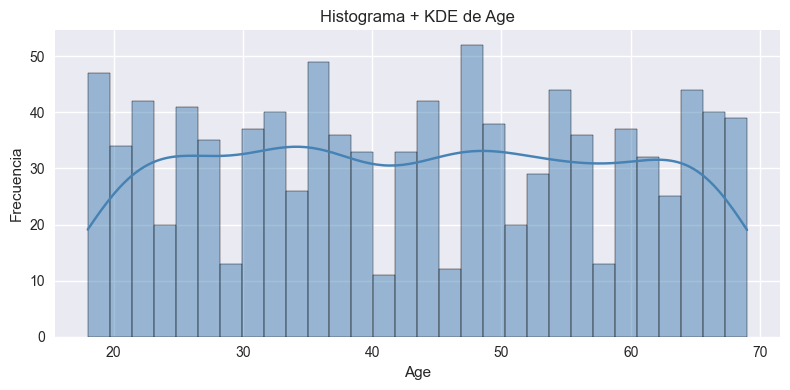

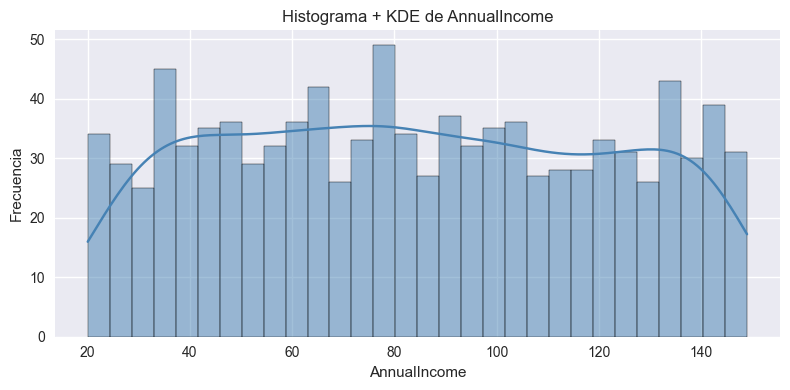

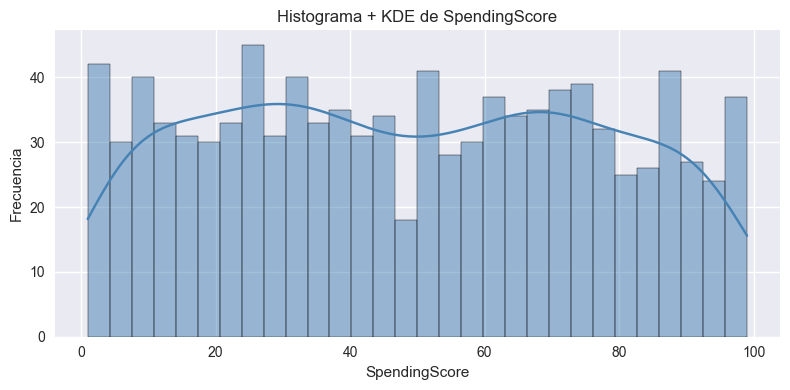

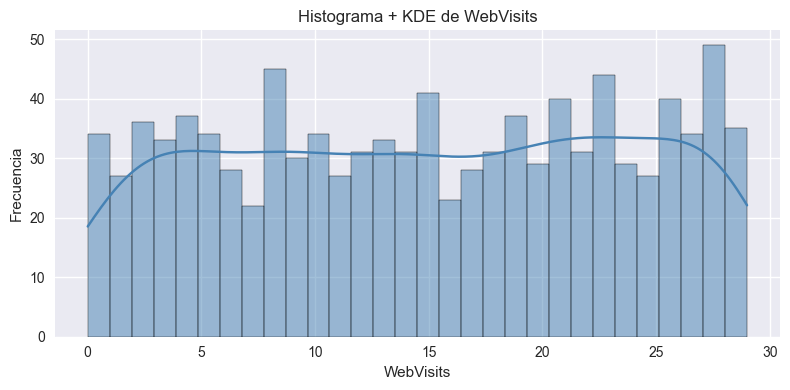

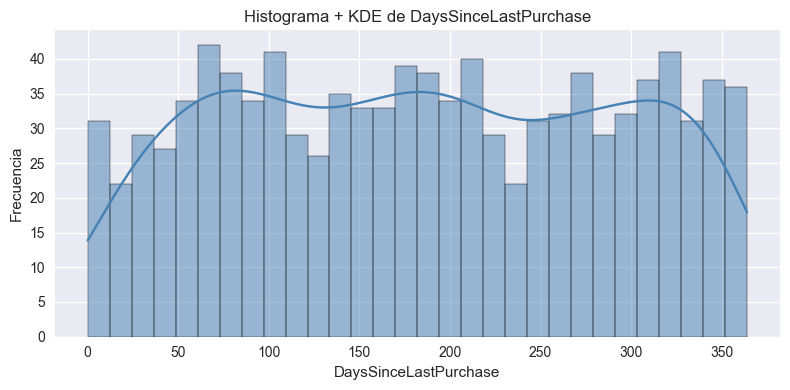

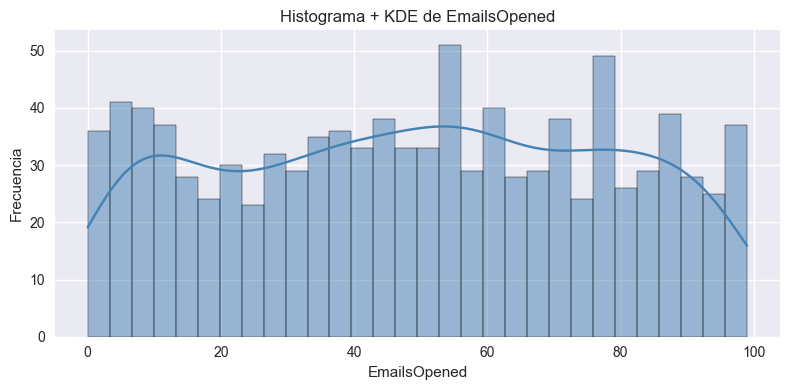

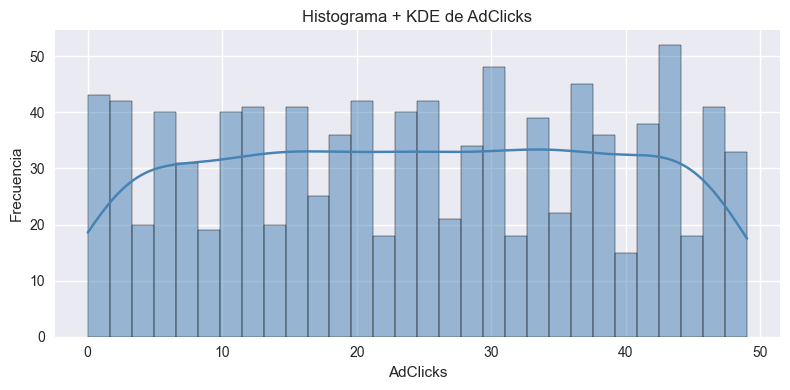

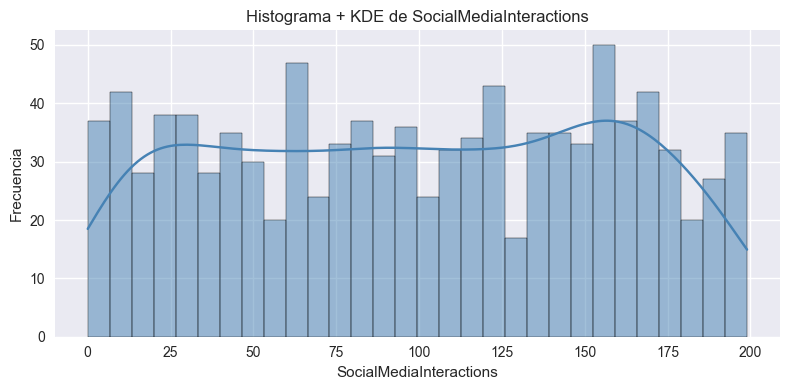

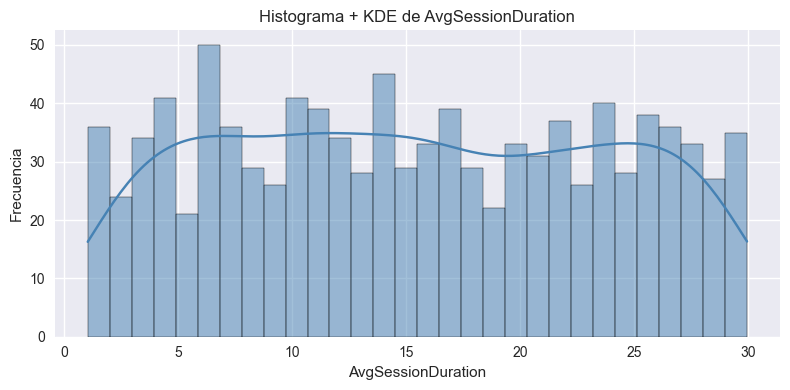

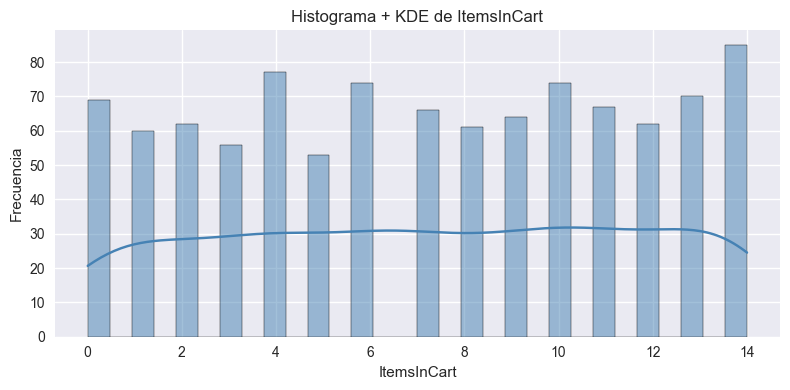

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Crear gráficos
plt.style.use("seaborn-v0_8")

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30, color="steelblue")
    plt.title(f"Histograma + KDE de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()